<a href="https://colab.research.google.com/github/Jacob-Bendele/Python-Coursework/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jacob Bendele<br>
• Analyzing feature from the Titanic Passenger dataset.



#Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.chdir('drive/My Drive/Machine Learning/')  #change dir

In [ ]:

!mkdir train  #create a directory named train/
!mkdir test  #create a directory named test/
!unzip -q titanic.zip
!mv test.csv test
!mv train.csv train

In [ ]:
train_df = pd.read_csv("train/train.csv")
test_df = pd.read_csv("test/test.csv")
combine = [train_df, test_df]

#Subtask 2

##Pclass to Survival Rate

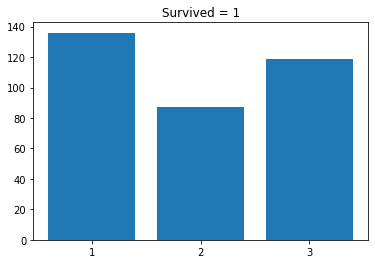

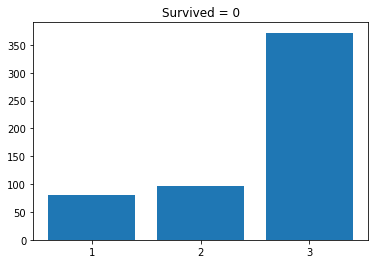

Average Survived Ratio Class 1:  0.6296296296296297


In [ ]:
Pclass = train_df.loc[:,"Pclass"]
Survived = train_df.loc[:,"Survived"]
f = {"Pclass" : Pclass, "Survived" : Survived}
df = pd.DataFrame(f)

countS = np.zeros(3)
countD = np.zeros(3)

for ind in df.index:
  if df["Survived"][ind] == 1:
   countS[df["Pclass"][ind] - 1] += 1

  else:
    countD[df["Pclass"][ind] - 1] += 1

plt.bar(np.arange(len(countS)), countS)
plt.xticks(np.arange(len(countS)), ("1", "2", "3"))
plt.title("Survived = 1", loc="center")
plt.show()

plt.bar(np.arange(len(countD)), countD)
plt.xticks(np.arange(len(countD)), ("1", "2", "3"))
plt.title("Survived = 0", loc="center")
plt.show()

print("Average Survived Ratio Class 1: ", countS[0] / (countS[0] + countD[0]))

##Women More Likely to Survive

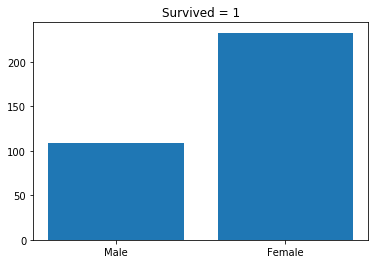

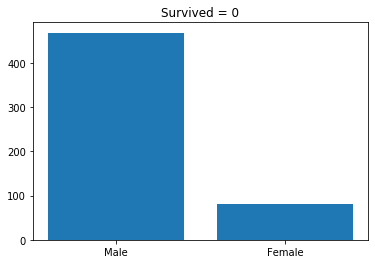

Ratio of women who survived to total survivors  0.6812865497076024
Ratio of women who survived to total women  0.7420382165605095


In [ ]:
Sex = train_df.loc[:,"Sex"]
Survived = train_df.loc[:,"Survived"]
f = {"Sex" : Sex, "Survived" : Survived}
df = pd.DataFrame(f)

countS = np.zeros(2)
countD = np.zeros(2)

for ind in df.index:
  if df["Survived"][ind] == 1:
    if df["Sex"][ind] == "male":
      countS[0] += 1

    else:
      countS[1] += 1

  else:
    if df["Sex"][ind] == "male":
      countD[0] += 1

    else:
      countD[1] += 1

plt.bar(np.arange(len(countS)), countS)
plt.xticks(np.arange(len(countS)), ("Male", "Female"))
plt.title("Survived = 1", loc="center")
plt.show()

plt.bar(np.arange(len(countD)), countD)
plt.xticks(np.arange(len(countD)), ("Male", "Female"))
plt.title("Survived = 0", loc="center")
plt.show()

print("Ratio of women who survived to total survivors ", countS[1] / (countS[0] + countS[1]))
print("Ratio of women who survived to total women ", countS[1] / (countD[1] + countS[1]))

##Age and Survival

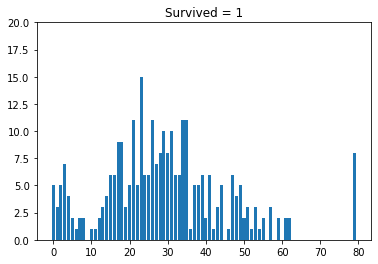

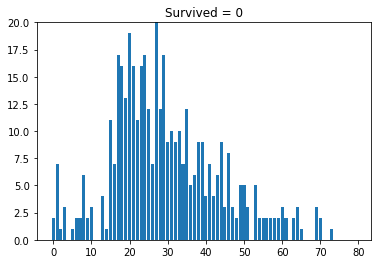

In [ ]:
Age = train_df.loc[:,"Age"]
Survived = train_df.loc[:,"Survived"]
f = {"Age" : Age, "Survived" : Survived}
df = pd.DataFrame(f)

countS = np.zeros(int(df.loc[:,"Age"].max()))
countD = np.zeros(int(df.loc[:,"Age"].max()))

for ind in df.index:
  if math.isnan(df["Age"][ind]):
    continue

  if df["Survived"][ind] == 1:
    countS[int(df["Age"][ind]) - 1] += 1

  else:
    countD[int(df["Age"][ind]) - 1] += 1

plt.bar(np.arange(len(countS)), countS)
plt.ylim([0,20])
#plt.xticks(np.arange(len(countS)), ("Male", "Female"))
plt.title("Survived = 1", loc="center")
plt.show()

plt.bar(np.arange(len(countD)), countD)
plt.ylim([0,20])
#plt.xticks(np.arange(len(countD)), ("Male", "Female"))
plt.title("Survived = 0", loc="center")
plt.show()


##Comine Features Age, Pclass, and Survived

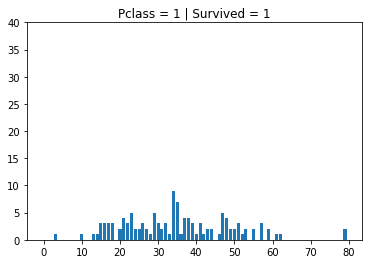

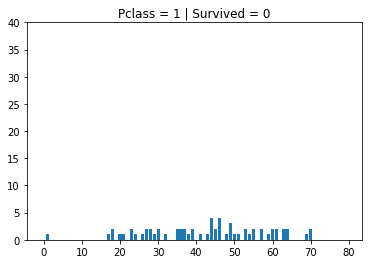

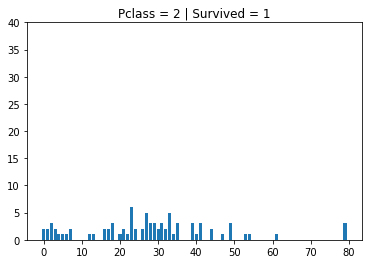

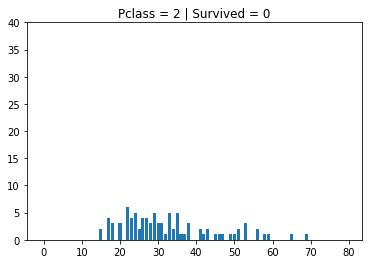

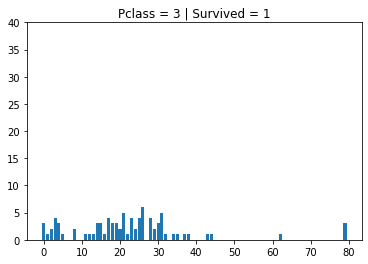

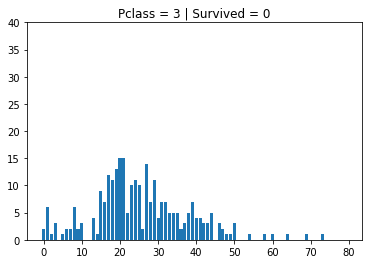

In [ ]:
Age = train_df.loc[:,"Age"]
Survived = train_df.loc[:,"Survived"]
Pclass = train_df.loc[:,"Pclass"]
f = {"Age" : Age, "Survived" : Survived, "Pclass" : Pclass}
df = pd.DataFrame(f)

countS = np.zeros(int(df.loc[:,"Age"].max()))
countD = np.zeros(int(df.loc[:,"Age"].max()))

for Pcls in range(1,4):
  for ind in df.index:
    if math.isnan(df["Age"][ind]):
      continue

    if df["Pclass"][ind] != Pcls:
      continue

    if df["Survived"][ind] == 1:
      countS[int(df["Age"][ind]) - 1] += 1

    else:
      countD[int(df["Age"][ind]) - 1] += 1

  
  plt.bar(np.arange(len(countS)), countS)
  plt.ylim([0,40])
  #plt.xticks(np.arange(len(countS)), ("Male", "Female"))
  plt.title("Pclass = %d | Survived = 1" % Pcls, loc="center")
  plt.show()

  plt.bar(np.arange(len(countD)), countD)
  plt.ylim([0,40])
  #plt.xticks(np.arange(len(countD)), ("Male", "Female"))
  plt.title("Pclass = %d | Survived = 0" % Pcls, loc="center")
  plt.show()

  # Zero out the arrays
  countS = np.zeros(int(df.loc[:,"Age"].max()))
  countD = np.zeros(int(df.loc[:,"Age"].max()))




##Combine Features Embarked, Sex, Fare, and Survived


891
True


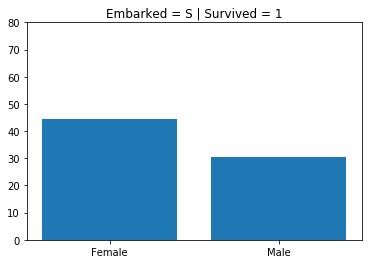

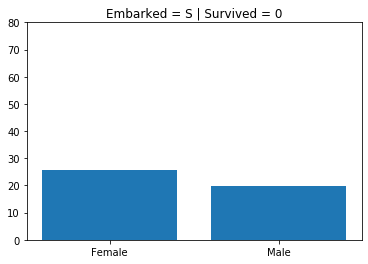

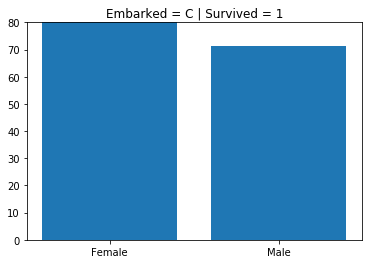

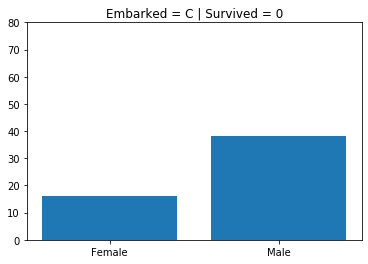

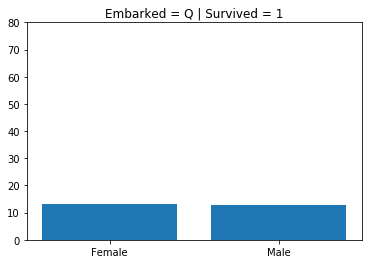

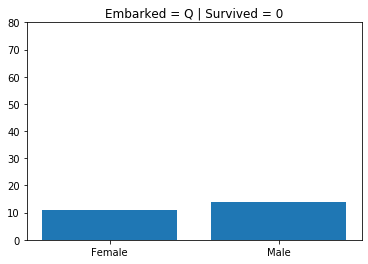

In [ ]:
Sex = train_df.loc[:,"Sex"]
Survived = train_df.loc[:,"Survived"]
Embarked = train_df.loc[:,"Embarked"]
Fare = train_df.loc[:,"Fare"]

f = {"Sex" : Sex, "Survived" : Survived, "Embarked" : Embarked, "Fare" : Fare}
df = pd.DataFrame(f)

SMS = np.zeros(2)
SFS = np.zeros(2)
SMD = np.zeros(2)
SFD = np.zeros(2)

CMS = np.zeros(2)
CFS = np.zeros(2)
CMD = np.zeros(2)
CFD = np.zeros(2)

QMS = np.zeros(2)
QFS = np.zeros(2)
QFD = np.zeros(2)
QMD = np.zeros(2)

print(len(Embarked))

print(Embarked.isnull().any())


for ind in df.index:
  if df["Embarked"][ind] == "S":
    if df["Sex"][ind] == "male":
      if df["Survived"][ind] == 1:
        SMS[0] += df["Fare"][ind]
        SMS[1] += 1

      else:
        SMD[0] += df["Fare"][ind]
        SMD[1] += 1
    
    else:
      if df["Survived"][ind] == 1:
        SFS[0] += df["Fare"][ind]
        SFS[1] += 1

      else:
        SFD[0] += df["Fare"][ind]
        SFD[1] += 1        

  if df["Embarked"][ind] == "C":
    if df["Sex"][ind] == "male":
      if df["Survived"][ind] == 1:
        CMS[0] += df["Fare"][ind]
        CMS[1] += 1

      else:
        CMD[0] += df["Fare"][ind]
        CMD[1] += 1
    
    else:
      if df["Survived"][ind] == 1:
        CFS[0] += df["Fare"][ind]
        CFS[1] += 1
        
      else:
        CFD[0] += df["Fare"][ind]
        CFD[1] += 1      

  if df["Embarked"][ind] == "Q":
    if df["Sex"][ind] == "male":
      if df["Survived"][ind] == 1:
        QMS[0] += df["Fare"][ind]
        QMS[1] += 1

      else:
        QMD[0] += df["Fare"][ind]
        QMD[1] += 1
    
    else:
      if df["Survived"][ind] == 1:
        QFS[0] += df["Fare"][ind]
        QFS[1] += 1
        
      else:
        QFD[0] += df["Fare"][ind]
        QFD[1] += 1          

plt.ylim([0,80])
countS = np.zeros(2)
countS[0] = SFS[0] / SFS[1]
countS[1] = SMS[0] / SMS[1]
plt.bar(np.arange(len(countS)), countS)
plt.xticks(np.arange(len(countS)), ("Female", "Male"))
plt.title("Embarked = S | Survived = 1", loc="center")
plt.show()

plt.ylim([0,80])
countS[0] = SFD[0] / SFD[1]
countS[1] = SMD[0] / SMD[1]
plt.bar(np.arange(len(countS)), countS)
plt.xticks(np.arange(len(countS)), ("Female", "Male"))
plt.title("Embarked = S | Survived = 0", loc="center")
plt.show()

plt.ylim([0,80])
countS[0] = CFS[0] / CFS[1]
countS[1] = CMS[0] / CMS[1]
plt.bar(np.arange(len(countS)), countS)
plt.xticks(np.arange(len(countS)), ("Female", "Male"))
plt.title("Embarked = C | Survived = 1", loc="center")
plt.show()

plt.ylim([0,80])
countS[0] = CFD[0] / CFD[1]
countS[1] = CMD[0] / CMD[1]
plt.bar(np.arange(len(countS)), countS)
plt.xticks(np.arange(len(countS)), ("Female", "Male"))
plt.title("Embarked = C | Survived = 0", loc="center")
plt.show()

plt.ylim([0,80])
countS[0] = QFS[0] / QFS[1]
countS[1] = QMS[0] / QMS[1]
plt.bar(np.arange(len(countS)), countS)
plt.xticks(np.arange(len(countS)), ("Female", "Male"))
plt.title("Embarked = Q | Survived = 1", loc="center")
plt.show()

plt.ylim([0,80])
countS[0] = QFD[0] / QFD[1]
countS[1] = QMD[0] / QMD[1]
plt.bar(np.arange(len(countS)), countS)
plt.xticks(np.arange(len(countS)), ("Female", "Male"))
plt.title("Embarked = Q | Survived = 0", loc="center")
plt.show()




##Rate of Duplicate Ticket Features

In [ ]:
dup_ticket = train_df.pivot_table(index=["Ticket"], aggfunc="size")

count = 0

for i in range(len(dup_ticket)):
  if dup_ticket[i] > 1:
    count += 1

print(dup_ticket)
print("Total number of tickets that have a duplicate: %d" % count)



Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64
Total number of tickets that have a duplicate: 134


## Count Null Cabin Features

In [ ]:
print(train_df.loc[:,"Cabin"].isnull())
print("\nThe number of missing cabins in train dataset ", train_df.loc[:,"Cabin"].isnull().sum())
print()
print(test_df.loc[:,"Cabin"].isnull())
print("\nThe number of missing cabins in test dataset ", test_df.loc[:,"Cabin"].isnull().sum())
print("\nTotal number of missing cabins %d" % (train_df.loc[:,"Cabin"].isnull().sum() + test_df.loc[:,"Cabin"].isnull().sum()))
print("\nTotal number of cabins %d" % ((train_df.loc[:,"Cabin"].size + (test_df.loc[:,"Cabin"].size))))

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

The number of missing cabins in train dataset  687

0       True
1       True
2       True
3       True
4       True
       ...  
413     True
414    False
415     True
416     True
417     True
Name: Cabin, Length: 418, dtype: bool

The number of missing cabins in test dataset  327

Total number of missing cabins 1014

Total number of cabins 1309


##Converting String Features to Numerical Features


In [ ]:
train_df.rename(columns = {'Sex':'Gender'}, inplace = True)

for i in range(len(train_df.loc[:,"Gender"])):
  if train_df["Gender"][i] == "female":
    train_df["Gender"][i] = 1

  elif train_df["Gender"][i] == "male":
    train_df["Gender"][i] = 0

print(train_df.loc[:,"Gender"])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Gender, Length: 891, dtype: object


##Completing Age Feature


In [ ]:
print(train_df["Age"].isnull().any())
print(test_df["Age"].isnull().any())

#Simple Method Global Mean
globalMean = (train_df["Age"].mean() + test_df["Age"].mean()) / 2
print(globalMean)
print(int(globalMean))

train_df["Age"].fillna((int(globalMean)), inplace = True)
test_df["Age"].fillna((int(globalMean)), inplace = True)

print(train_df["Age"].isnull().any())
print(test_df["Age"].isnull().any())

True
True
29.985854004252303
29
False
False


##Completing Embarked Feature

In [ ]:
print(train_df.isnull().any())

mostfreq = train_df["Embarked"].value_counts().idxmax()

train_df["Embarked"].fillna(mostfreq, inplace = True)

print(train_df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Gender         False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId    False
Survived       False
Pclass         False
Name           False
Gender         False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


##Completing Fare Feature


In [ ]:
print(test_df.isnull().any())

mode = train_df.loc[:,"Fare"].value_counts()
mode2 = test_df.loc[:,"Fare"].value_counts()


if mode.max() > mode2.max():
  test_df["Fare"].fillna(mode.idxmax(), inplace = True)

elif mode2.max() > mode.max():
  test_df["Fare"].fillna(mode2.idxmax(), inplace = True)
  

print(test_df.isnull().any())


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


##Converting Fare to Oridnal Fare based on FareBands

In [ ]:
print(train_df["Fare"])
print()
print(test_df["Fare"])

for i in train_df.index:
  if train_df["Fare"][i] > -0.001 and train_df["Fare"][i] <= 7.91:
    train_df["Fare"][i] = 0

  elif train_df["Fare"][i] > 7.91 and train_df["Fare"][i] <= 14.454:
    train_df["Fare"][i] = 1

  elif train_df["Fare"][i] > 14.454 and train_df["Fare"][i] <= 31.0:
    train_df["Fare"][i] = 2

  elif train_df["Fare"][i] > 31.0 and train_df["Fare"][i] <= 512.329:
    train_df["Fare"][i] = 3

for i in test_df.index:
  if test_df["Fare"][i] > -0.001 and test_df["Fare"][i] <= 7.91:
    test_df["Fare"][i] = 0

  elif test_df["Fare"][i] > 7.91 and test_df["Fare"][i] <= 14.454:
    test_df["Fare"][i] = 1

  elif test_df["Fare"][i] > 14.454 and test_df["Fare"][i] <= 31.0:
    test_df["Fare"][i] = 2

  elif test_df["Fare"][i] > 31.0 and test_df["Fare"][i] <= 512.329:
    test_df["Fare"][i] = 3



print(train_df["Fare"])
print()
print(test_df["Fare"])

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       20.0000
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64
0      0.0
1      3.0
2      1.0
3      3.0
4      1.0
      ... 
886    1.0
887    2.0
888    2.0
889    2.0
890    0.0
Name: Fare, Length: 891, dtype: float64

0      0.0
1      0.0
2      1.0
3      1.0
4      2.0
      ... 
413    1.0
414    3.0
415    0.0
416    1.0
417    2.0
Name: Fare, Length: 418, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python